#**TASK 1 by Himanshu**

##Importing IRIS Data

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/him-spz/Nexus_Intern/main/Task-1/IRIS.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Data Separation as X and Y


In [3]:
df['SpeciesCode'] = df['Species'].map({'Iris-setosa': '01', 'Iris-versicolor': '02', 'Iris-virginica': '03'})
y = df['SpeciesCode']
y

0      01
1      01
2      01
3      01
4      01
       ..
145    03
146    03
147    03
148    03
149    03
Name: SpeciesCode, Length: 150, dtype: object

In [4]:
cols = ['Species' , 'SpeciesCode']
x = df.drop(columns = cols, axis=1)
x

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


### Data Splitting

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 100)

In [6]:
x_train

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
81,82,5.5,2.4,3.7,1.0
99,100,5.7,2.8,4.1,1.3
119,120,6.0,2.2,5.0,1.5
12,13,4.8,3.0,1.4,0.1
16,17,5.4,3.9,1.3,0.4
...,...,...,...,...,...
87,88,6.3,2.3,4.4,1.3
103,104,6.3,2.9,5.6,1.8
67,68,5.8,2.7,4.1,1.0
24,25,4.8,3.4,1.9,0.2


In [7]:
y_train

81     02
99     02
119    03
12     01
16     01
       ..
87     02
103    03
67     02
24     01
8      01
Name: SpeciesCode, Length: 120, dtype: object

##Model Building


###Linear Regression

Training the Model


In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [9]:
y_lr_train_pd = lr.predict(x_train)
y_lr_test_pd = lr.predict(x_test)

Model Evaluation for Linear Regression

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pd)
lr_train_r2 = r2_score(y_train, y_lr_train_pd)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pd)
lr_test_r2 = r2_score(y_test, y_lr_test_pd)

###Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [12]:
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation for Logistic Regression

In [13]:
y_model_train_pd = model.predict(x_train)
y_model_test_pd = model.predict(x_test)

In [14]:
print(y_model_train_pd, y_model_test_pd)

['02' '02' '03' '01' '01' '02' '01' '02' '03' '03' '01' '02' '03' '03'
 '01' '01' '01' '01' '02' '01' '01' '01' '02' '03' '03' '02' '03' '02'
 '03' '03' '02' '01' '03' '03' '03' '01' '01' '03' '01' '01' '01' '02'
 '03' '03' '03' '01' '02' '02' '01' '02' '02' '03' '01' '02' '02' '02'
 '02' '02' '02' '03' '03' '01' '02' '01' '02' '03' '03' '03' '02' '01'
 '01' '01' '01' '03' '01' '01' '02' '01' '03' '02' '03' '01' '03' '03'
 '01' '02' '02' '02' '03' '02' '02' '01' '01' '01' '03' '02' '02' '01'
 '03' '03' '03' '02' '02' '02' '02' '03' '03' '01' '01' '02' '02' '02'
 '02' '03' '02' '02' '03' '02' '01' '01'] ['03' '01' '03' '01' '03' '03' '01' '01' '03' '01' '01' '03' '01' '01'
 '03' '02' '02' '02' '03' '03' '03' '01' '03' '01' '02' '03' '02' '01'
 '02' '03']


In [15]:
model_train_mse = mean_squared_error(y_train, y_model_train_pd)
model_train_r2 = r2_score(y_train, y_model_train_pd)

model_test_mse = mean_squared_error(y_test, y_model_test_pd)
model_test_r2 = r2_score(y_test, y_model_test_pd)

###Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

Model Evaluation for Random Forest Classifier

In [17]:
y_rf_train_pd = rf.predict(x_train)
y_rf_test_pd = rf.predict(x_test)

In [18]:
rf_train_mse = mean_squared_error(y_train, y_rf_train_pd)
rf_train_r2 = r2_score(y_train, y_rf_train_pd)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pd)
rf_test_r2 = r2_score(y_test, y_rf_test_pd)

##Conclusion

In [19]:
data ={
    'Model' : ['Linear Regression', 'Logistic Regression', 'Random Forest Classifier'],
    'Model Score' : [lr.score(x_test, y_test), model.score(x_test, y_test), rf.score(x_test, y_test)],
    'Train MSE' : [lr_train_mse, model_train_mse, rf_train_mse],
    'Test MSE' : [lr_test_mse, model_test_mse, rf_test_mse],
    'Training R2' : [lr_train_r2, model_train_r2, rf_train_r2],
    'Test R2' : [lr_test_r2, model_test_r2, rf_test_r2]
}

# results = pd.DataFrame(['Linear Regression', lr.score(x_test, y_test), lr_train_mse, lr_test_mse, lr_train_r2, lr_test_r2]).transpose()

# results.columns = ['Model', 'Model Score', 'Training MSE', 'Test MSE', 'Training R2', 'Test R2']
results = pd.DataFrame(data)
results

,Model,Model Score,Train MSE,Test MSE,Training R2,Test R2
0,Linear Regression,0.974998,0.03023,0.01989,0.952247,0.974998
1,Logistic Regression,1.000000,0.00000,0.00000,1.000000,1.000000
2,Random Forest Classifier,1.000000,0.00000,0.00000,1.000000,1.000000


##EDA of data given


In [20]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SpeciesCode
0,1,5.1,3.5,1.4,0.2,Iris-setosa,01
1,2,4.9,3.0,1.4,0.2,Iris-setosa,01
2,3,4.7,3.2,1.3,0.2,Iris-setosa,01
3,4,4.6,3.1,1.5,0.2,Iris-setosa,01
4,5,5.0,3.6,1.4,0.2,Iris-setosa,01


In [21]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [22]:
print(df.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
SpeciesCode      0
dtype: int64


###Histogram for each properties

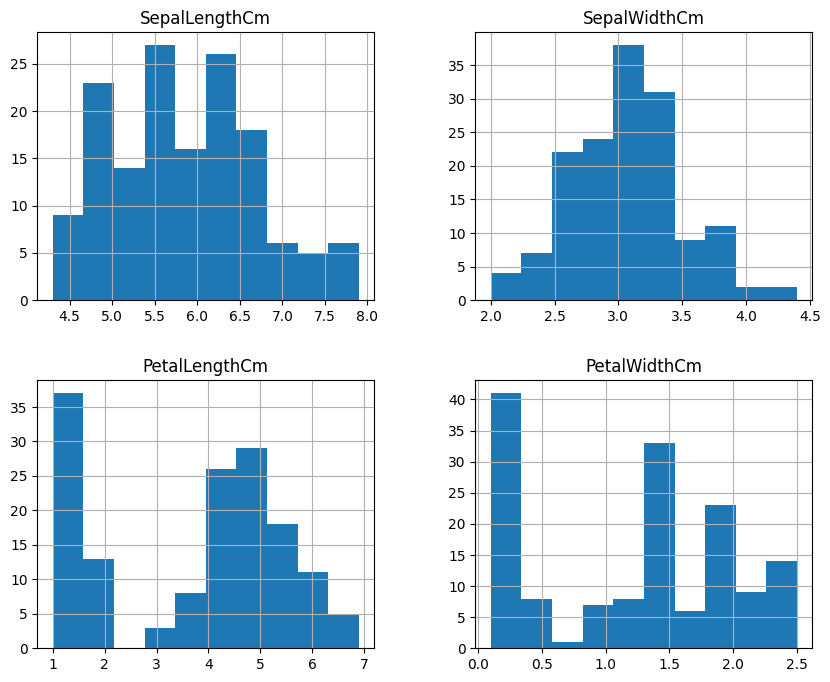

In [26]:
import matplotlib.pyplot as plt
z = df.drop(['Id'], axis=1)
z.hist(figsize=(10, 8))
plt.show()

###Pairplot of each properties with each other

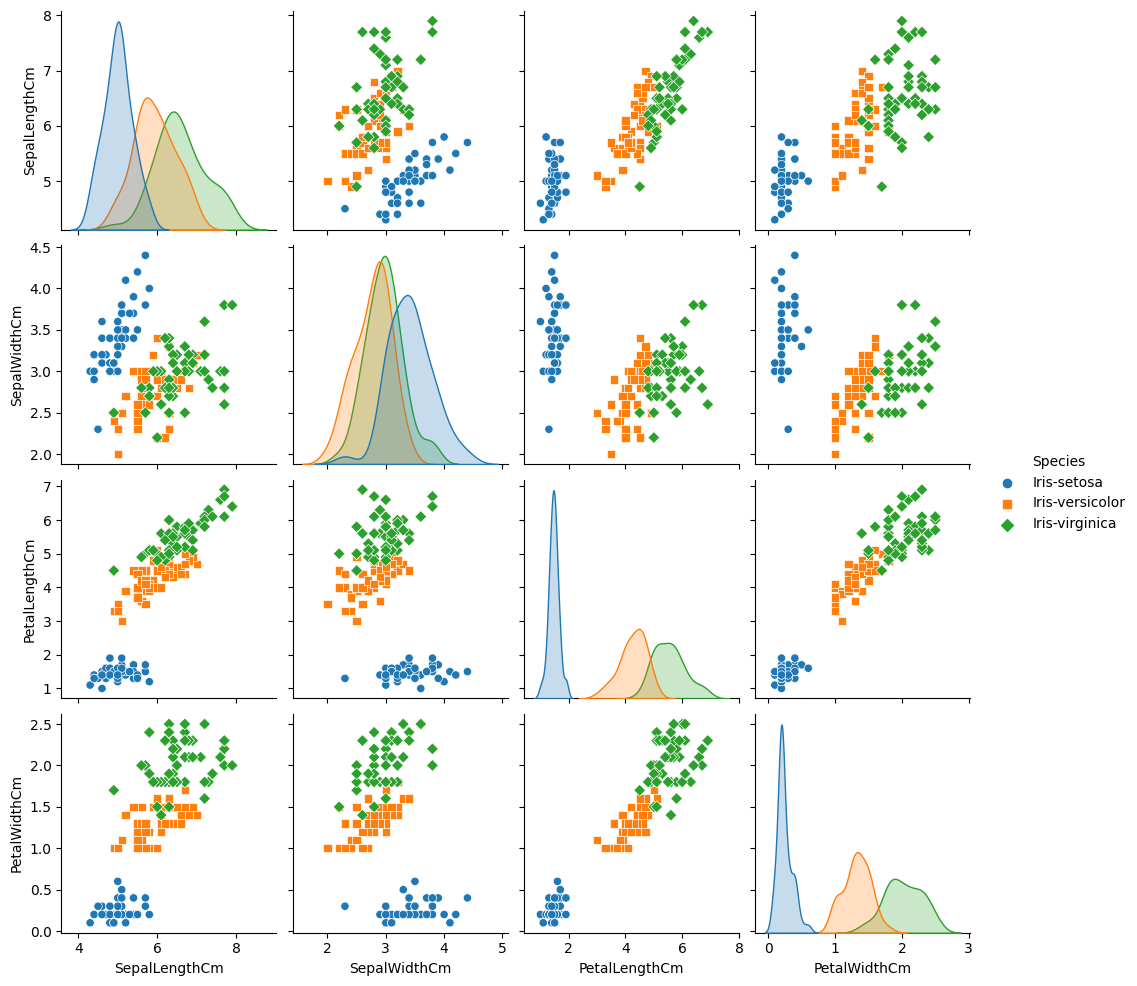

In [28]:
import seaborn as sns
sns.pairplot(z, hue='Species', markers=["o", "s", "D"])
plt.show()

###Box Plot of SPecies type with each properties

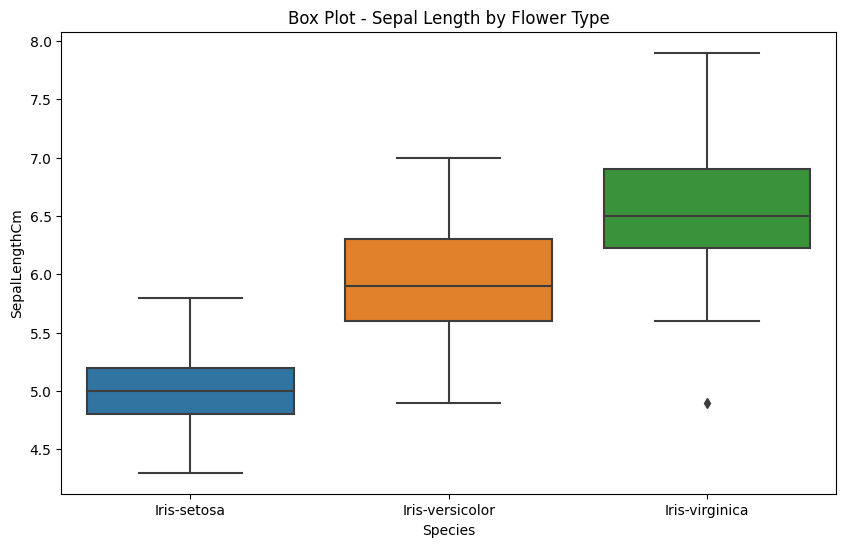

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Species', y='SepalLengthCm', data=z)
plt.title('Box Plot - Sepal Length by Species')
plt.show()

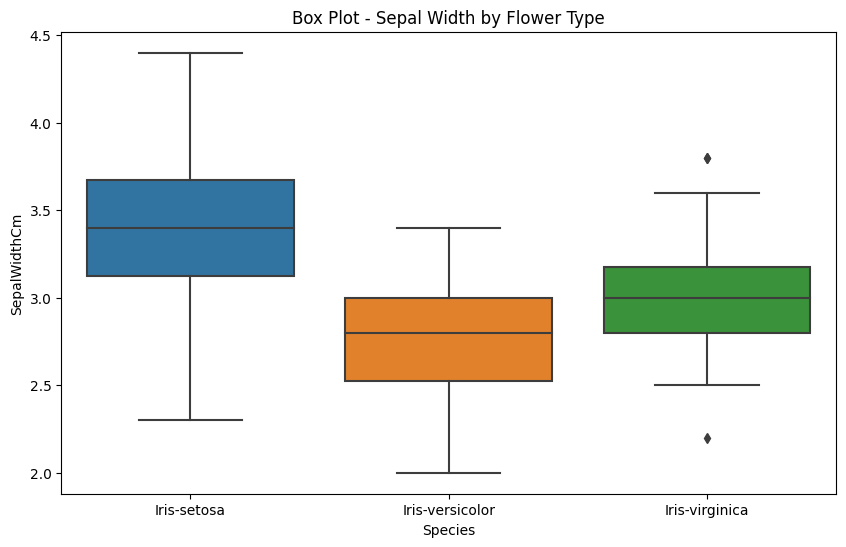

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Species', y='SepalWidthCm', data=z)
plt.title('Box Plot - Sepal Width by Species')
plt.show()

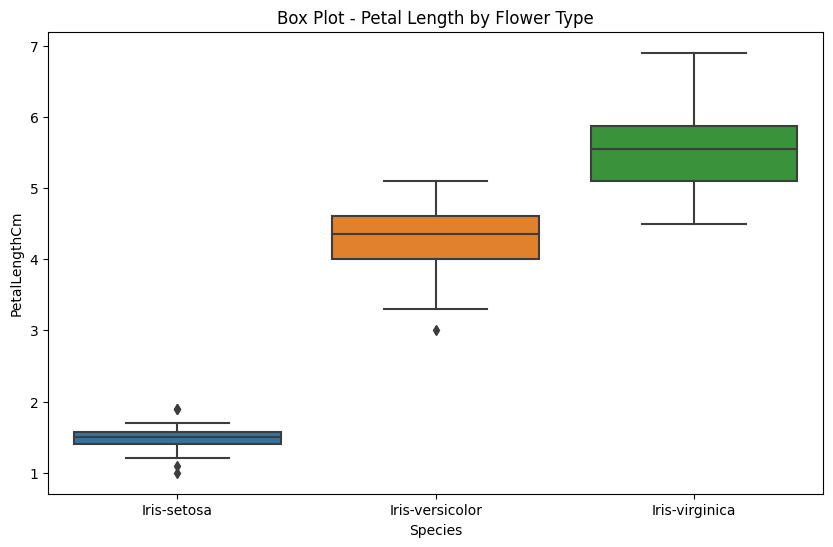

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Species', y='PetalLengthCm', data=z)
plt.title('Box Plot - Petal Length by Species')
plt.show()

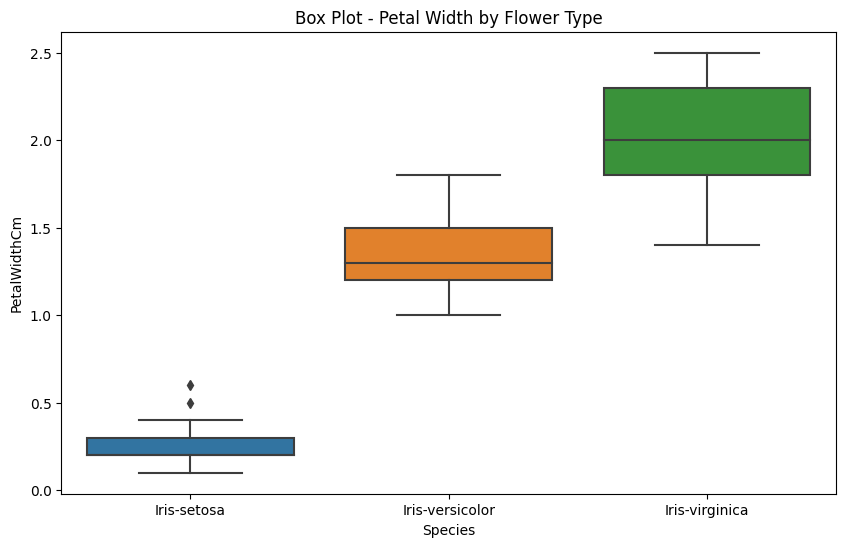

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Species', y='PetalWidthCm', data=z)
plt.title('Box Plot - Petal Width by Species')
plt.show()

Correlation Matrix of properties

<ipython-input-33-7c02875bc330>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = z.corr()


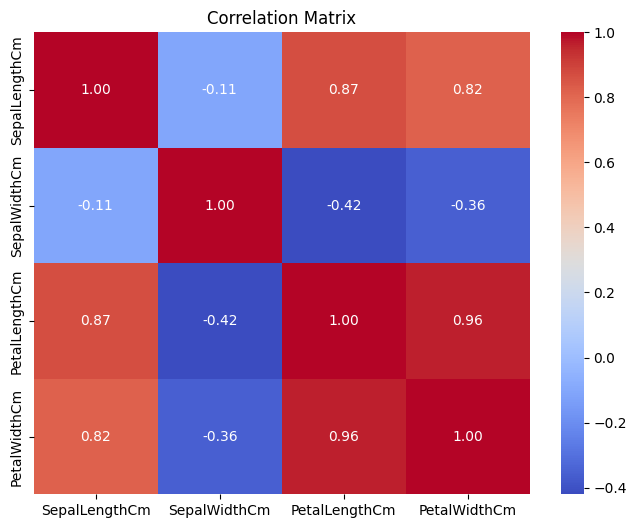

In [33]:
correlation_matrix = z.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#End